<a href="https://colab.research.google.com/github/aasyngier/machine-learning/blob/main/ml_homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Polynomial Kernel SVM in 3D Feature Space**
-------------------------------
You have seen how a polynomial kernel of degree 2 can map the original 2D data
$$(x_1, x_2)$$
to a 3D feature space via some transformation
$$
\phi(\mathbf{x}).
$$
You also saw that **the decision boundary** in the 3D space—expected to be a hyperplane—**appears** as a circular surface when visualized.

## **Primary Question**

**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space *not* look like a “flat” hyperplane,**
even though we *know* the classifier’s separating surface *is* mathematically linear in that space?

## **Secondary Question**

Explain **why** a hyperplane in 3D becomes a **circular (or elliptical) curve** when viewed back in the original 2D plane of the dataset.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code to visualise and create plots.
   - Include a discussion (in markdown cells) illustrating the geometry behind the mapping
     $$\phi(\mathbf{x})$$
     and the resulting decision boundary.
   - Use
     `$` symbol to delimit inline equations and `$$` to delimit full-line equations.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.

In this notebook, we demonstrate how a polynomial kernel of degree 2 maps a 2D dataset into a 3D feature space and how the SVM’s decision boundary (a hyperplane in that 3D space) projects back to a circular (or elliptical) curve in the original 2D space.



##**1. Imports**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
np.random.seed(123)

##**2. Data Generation**


We create a simple "circles" dataset which is **not** linearly separable in 2D. We will then apply a 2nd-degree polynomial kernel SVM and examine how it separates the data in 3D space.

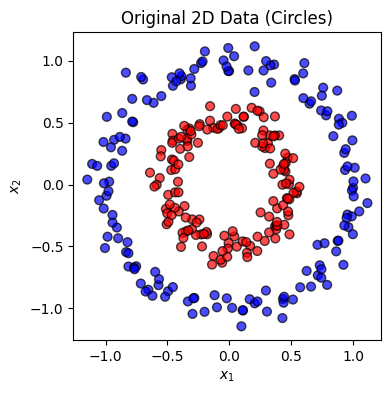

In [4]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.07)

y = np.where(y == 0, -1, 1)

plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40, alpha=0.7)
plt.title("Original 2D Data (Circles)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect('equal', 'box')
plt.show()

##**3. Train an SVM with a 2nd-Degree Polynomial Kernel**

In [5]:
clf = SVC(kernel='poly', degree=2, C=1.0, gamma=1, coef0=0)
clf.fit(X, y)

SVC(coef0=0, degree=2, gamma=1, kernel='poly')

##**4. Plot Decision Boundary in 2D**

We'll make a grid of points, compute `decision_function` at each, and plot:
- The main boundary where decision_function == 0,
- The margins where decision_function == ±1,
- The support vectors.

This shows how the boundary is **nonlinear** in 2D.

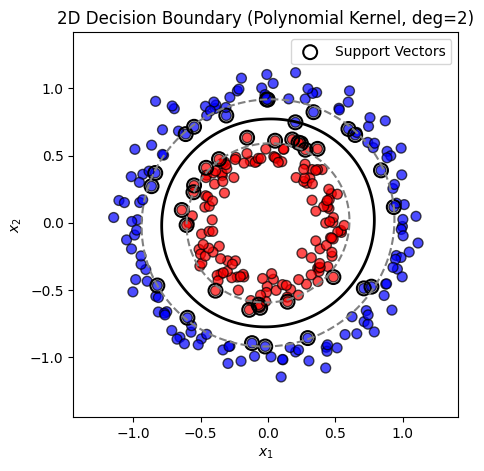

In [10]:
xx_min, xx_max = X[:, 0].min()-0.3, X[:, 0].max()+0.3
yy_min, yy_max = X[:, 1].min()-0.3, X[:, 1].max()+0.3

xx, yy = np.meshgrid(np.linspace(xx_min, xx_max, 300),
                     np.linspace(yy_min, yy_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = clf.decision_function(grid_points).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=50, alpha=0.7)
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)
plt.contour(xx, yy, Z, levels=[-1, 1], linestyles='--', colors='gray')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, linewidth=1.5, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("2D Decision Boundary (Polynomial Kernel, deg=2)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.show()


##**5. Explicit Mapping to 3D**

The 2nd-degree polynomial kernel in 2D corresponds to the mapping:

$$
\phi(x_1, x_2) \;=\; \bigl(x_1^2,\; \sqrt{2}\,x_1 x_2,\; x_2^2\bigr).
$$

We will transform:
1. Our original data $(x_1, x_2)$ to $\phi(x_1, x_2)$.
2. The grid points to $\phi$-space to see the boundary there.


In [11]:
def phi(x):
    x1, x2 = x
    return np.array([x1**2, np.sqrt(2)*x1*x2, x2**2])

X_phi = np.array([phi(point) for point in X])

grid_phi = np.array([phi(point) for point in grid_points])
Z_phi = clf.decision_function(grid_points).reshape(xx.shape)


##**6. Visualizing the Data and "Hyperplane" in 3D**

Here, we should see that the separating surface (once enough points are plotted) is a plane.


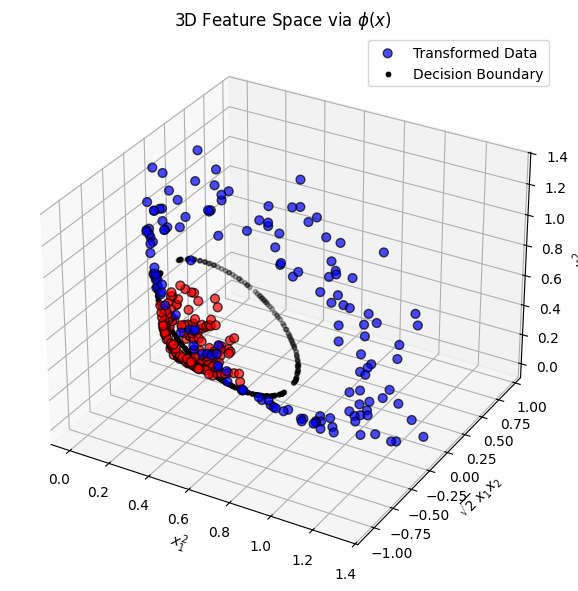

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_phi[:,0], X_phi[:,1], X_phi[:,2],
           c=y, cmap='bwr', edgecolor='k', s=40, alpha=0.7, label='Transformed Data')

boundary_mask = np.isclose(clf.decision_function(grid_points), 0, atol=0.01)
boundary_points = grid_phi[boundary_mask]

ax.scatter(boundary_points[:,0], boundary_points[:,1], boundary_points[:,2],
           c='k', s=10, label='Decision Boundary')

ax.set_title("3D Feature Space via $\\phi(x)$")
ax.set_xlabel("$x_1^2$")
ax.set_ylabel("$\\sqrt{2}\\, x_1 x_2$")
ax.set_zlabel("$x_2^2$")
ax.legend()
plt.tight_layout()
plt.show()


##**7. Answers to the Questions**

## Primary Question

**Why does the SVM’s decision boundary in the 3D feature space not look like a “flat” hyperplane, even though it is mathematically linear there?**

1. **Nonlinear Axes**  
   The coordinates $(x_1^2, \sqrt{2}\,x_1 x_2, x_2^2)$ come from a nonlinear mapping of $(x_1, x_2)$. Although the decision boundary is truly a flat hyperplane in $\phi$-space, standard 3D plotting uses ordinary Euclidean axes that do not match this nonlinear geometry. As a result, the hyperplane may appear curved or slanted.

2. **Viewing $\phi$-space in 3D**  
   We are imposing standard 3D coordinates on the transformed space. Mathematically, the boundary is indeed flat in $\phi$-space, but it looks bent in a typical 3D plot because these axes do not reflect the polynomial mapping.

---

## Secondary Question

**Why does a hyperplane in 3D become a circular (or elliptical) curve when viewed in the original 2D space?**

When you rewrite the hyperplane equation in terms of the original variables, you have
$$
w_1\,x_1^2 + w_2\,\bigl(\sqrt{2}\,x_1 x_2\bigr) + w_3\,x_2^2 + b = 0.
$$
Define
$$
\alpha = w_1,\quad \beta = \sqrt{2}\,w_2,\quad \gamma = w_3.
$$
Then the equation becomes
$$
\alpha\,x_1^2 + \beta\,x_1 x_2 + \gamma\,x_2^2 + b = 0.
$$
This is a quadratic (second-degree) equation in $x_1$ and $x_2$. In two dimensions, a quadratic equation generally represents a conic section (for example, a circle or an ellipse). Therefore, a flat hyperplane in $\phi$-space appears as a circular or elliptical boundary when it is expressed in terms of the original $(x_1, x_2)$.
